# Himanshu Bairagi (22CE02010)

Assignment:1     CAD LAB                                
____________________________________________________________________________________________

# Question:1
 Consider that the height of a hill is described by the given scalar field as
 # $$ h(x, y) = 200 − x^2 − 2y^2 $$

(a) Plot the given scalar field as both a three-dimensional (3D) surface plot and a two-dimensional (2D)
contour plot using Julia. (you may use the package Plots.jl for plotting).


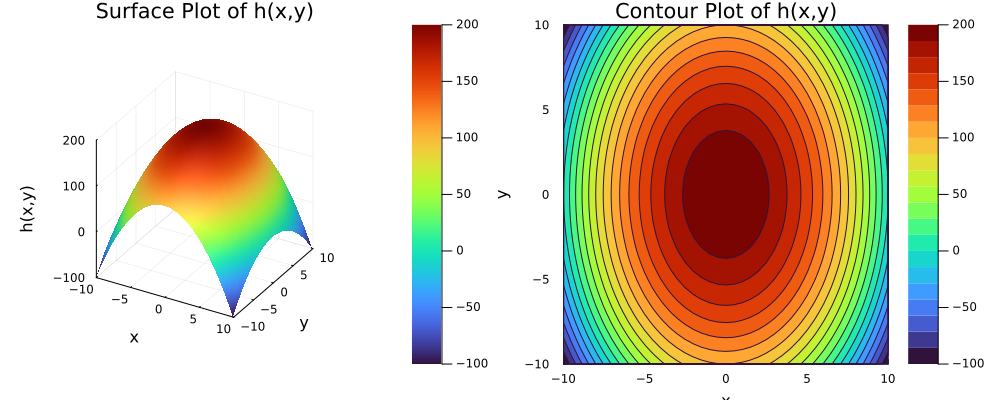

In [73]:
using Plots
gr()   

h(x,y) = 200 - x^2 - 2y^2

# range for x and y
x = -10:0.5:10
y = -10:0.5:10

# Evaluating field
z = [h(xi, yi) for xi in x, yi in y]

# Surface plot
p1 = surface(x, y, z, title="Surface Plot of h(x,y)",
             xlabel="x", ylabel="y", zlabel="h(x,y)",color=:turbo)

# Contour plot
p2 = contour(x, y, z, title="Contour Plot of h(x,y)",
             xlabel="x", ylabel="y",fill=true, color=:turbo, levels=20,colorbar=true)

# Combining as subplots
plot(p1, p2, layout=(1,2), size=(1000,400))


(b) Plot the gradient of the scalar field using the automatic gradient calculation tool available in Julia
(you may use the package called CalculusWithJulia.jl).

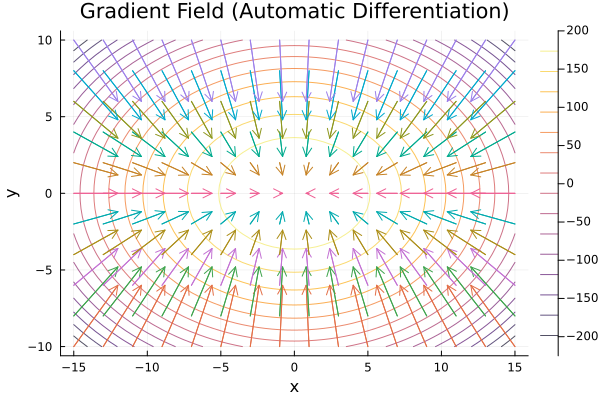

Gradient field showing that The gradient of a scalar field is a vector that points in the direction of the greatest rate of increase of the field.


In [113]:

#using ForwardDiff  
using CalculusWithJulia  
using Plots

h(x, y) = 200 - x^2 - 2*y^2

# Create grid for vector field
x_vec = -15:2:15
y_vec = -10:2:10

G(v)=200-v[1]^2-2*v[2]^2 

grad_h_auto(x,y)=gradient(G,[x,y])  

X = [x for x in x_vec, y in y_vec]
Y = [y for x in x_vec, y in y_vec]

# Using automatic differentiation to compute gradients
U = [grad_h_auto(xi, yi)[1] for xi in x_vec, yi in y_vec]  # ∂h/∂x                          
V = [grad_h_auto(xi, yi)[2] for xi in x_vec, yi in y_vec]  # ∂h/∂y                          


# PLOT: Gradient vector field using automatic differentiation
gradient_auto_plot = contour(x_range, y_range, h,
    xlabel="x",
    ylabel="y",
    title="Gradient Field (Automatic Differentiation)",
    alpha=0.7)

quiver!(gradient_auto_plot, X, Y, quiver=(U./10, V./10),
    label="∇h (auto)")

display(gradient_auto_plot)



println("="^60)
println("Gradient field showing that The gradient of a scalar field is a vector that points in the direction of the greatest rate of increase of the field.")
println("="^60)

# (c) 
Determine the gradient vector and plot the obtained gradient vector field (you may use the package
called Plots.jl or CalculusWithJulia.jl). [20]


Creating gradient vector field plot...


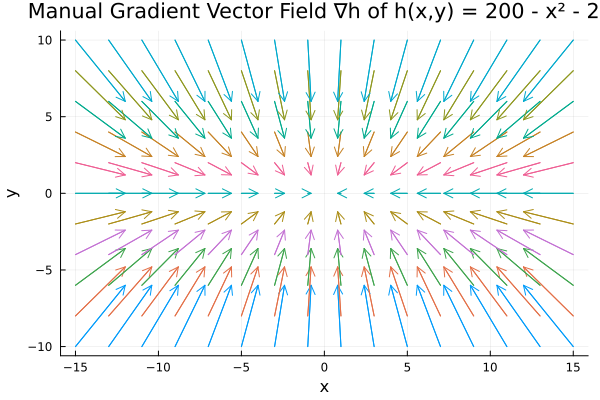

In [ ]:

using Plots

# Define the scalar field
h(x, y) = 200 - x^2 - 2*y^2

# Defininging manual gradient components
grad_x(x, y) = -2*x
grad_y(x, y) = -4*y

x_vec = -15:2:15
y_vec = -10:2:10

# Calculating gradient vectors at each grid point
X = [x for x in x_vec, y in y_vec]
Y = [y for x in x_vec, y in y_vec]
U = grad_x.(X, Y)
V = grad_y.(X, Y)

println("Creating gradient vector field plot...")

quiver(X, Y, quiver=(U./10, V./10),
  xlabel="x",
  ylabel="y",
  title="Manual Gradient Vector Field ∇h of h(x,y) = 200 - x² - 2y²")

# Question 2
Consider a cyclone in the northern hemisphere described by the velocity vector field of the wind:

# $$ v(x,y) = xe1 −y^2e2 $$

 where x and y are the coordinates in the horizontal plane, and e1 and e2 are unit vectors in the x- and
 y-directions, respectively.

(a) Plot the given vector field in Julia. (you may use the package called Plots.jl or CalculusWithJulia.jl).

Creating vector field plot...


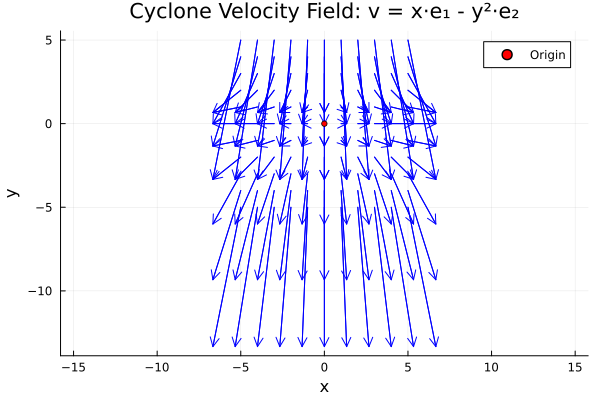

In [74]:

using Plots
println("="^60)

# Velocity components
v_x(x, y) = x         
v_y(x, y) = -y^2       

# Creating grid for vector field (coarser for clarity)
x_vec = -5:1:5
y_vec = -5:1:5

# Calculating velocity vectors at each grid point
X = [x for x in x_vec, y in y_vec]
Y = [y for x in x_vec, y in y_vec]
U = v_x.(X, Y)
V = v_y.(X, Y)

println("Creating vector field plot...")

vector_plot = plot(
    xlabel="x",
    ylabel="y",
    title="Cyclone Velocity Field: v = x·e₁ - y²·e₂",
    aspect_ratio=:equal,
    grid=true,
    legend=:topright)

quiver!(vector_plot, X, Y, quiver=(U./3, V./3),
    color=:blue,
    linewidth=1,
    arrow=true,
    label="Velocity vectors")

scatter!(vector_plot, [0], [0], 
    color=:red, 
    markersize=3, 
    label="Origin")

display(vector_plot)



# (b)
Plot the divergence of the vector field using automatic divergence calculation available in the Julia
package called CalculusWithJulia.jl. Also, determine the divergence using the detailed calculation
and plot the same. Compare both plots and verify the results.

Method_1
Calculating Divergence using CalculusWithJulia...


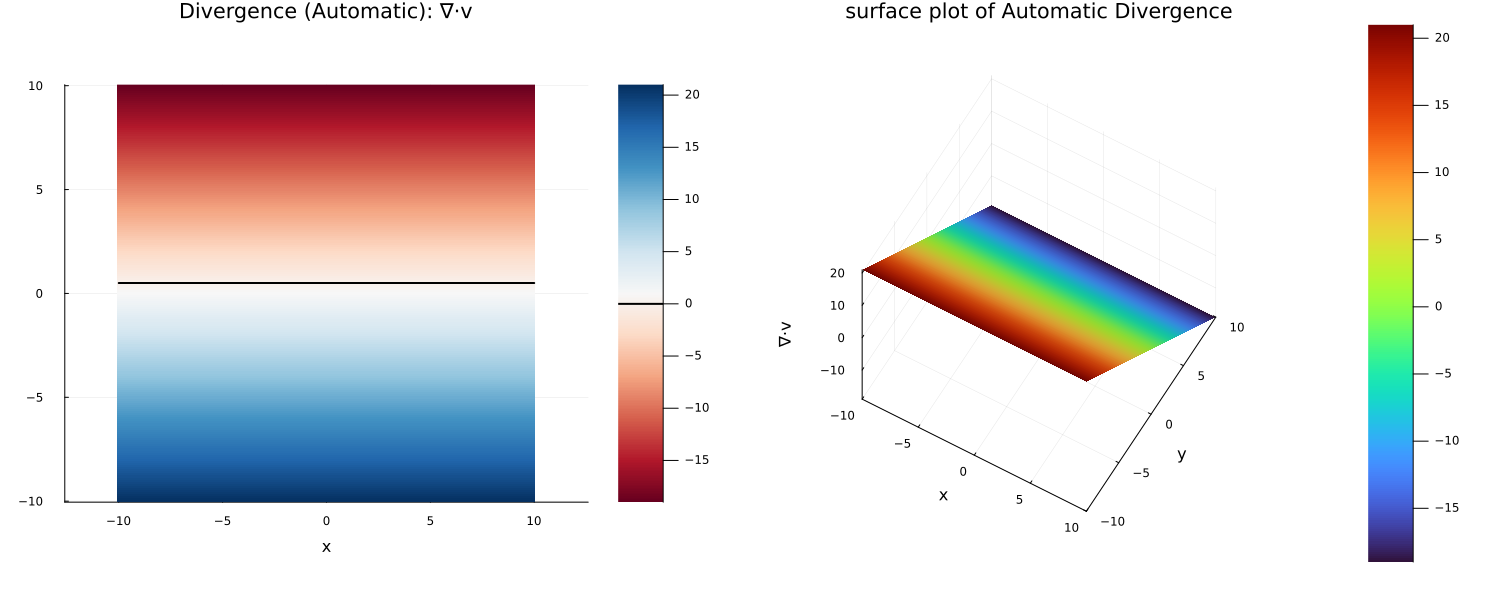

Creating Analytical divergence plots...


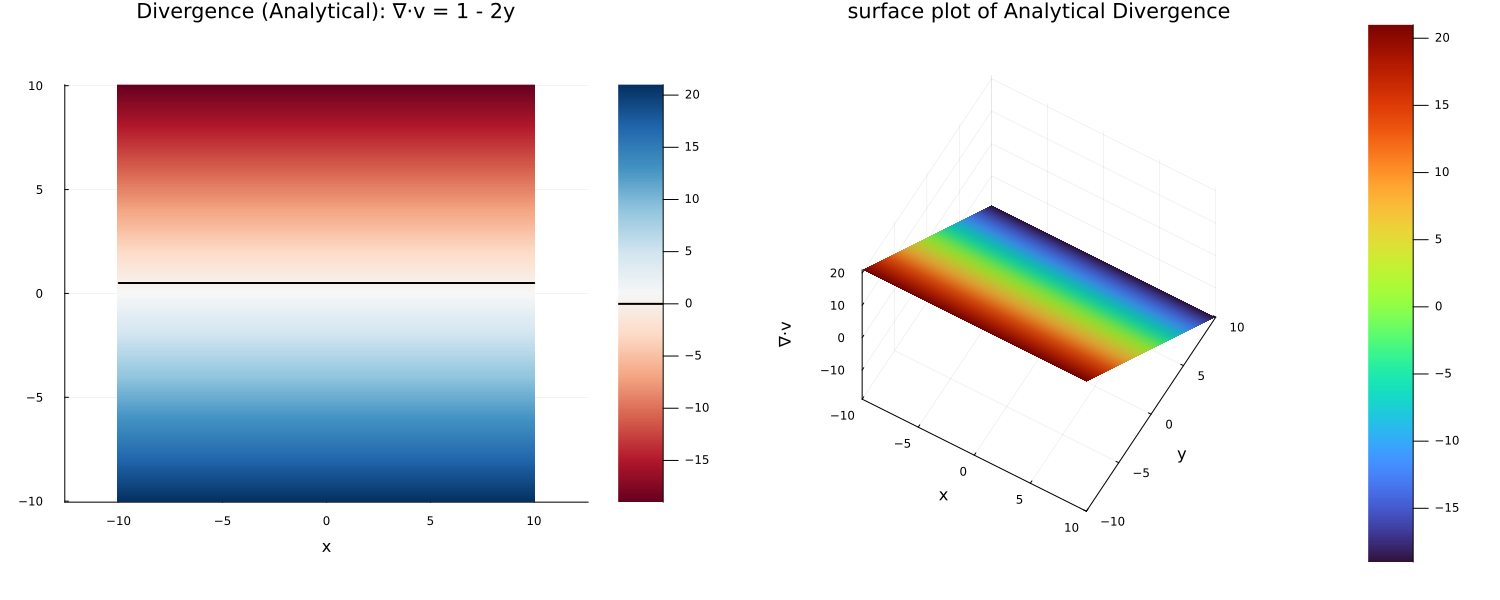

In [ ]:
using CalculusWithJulia
using Plots
#using ForwardDiff

#v_x(x, y) = x
#v_y(x, y) = -y^2

velocity_field(v)=[v[1], -v[2]^2]
# METHOD 1: AUTOMATIC DIVERGENCE using CalculusWithJulia
println("="^60)
println("Method_1")
println("Calculating Divergence using CalculusWithJulia...")
divergence_auto(x, y)=divergence(velocity_field,[x,y])    
# Defining domain
x_range = -10:0.1:10
y_range = -10:0.1:10          

velocity_field_divergence= [divergence_auto(xi, yi) for xi in x_range, yi in y_range]             
p1 = heatmap(x_range, y_range, velocity_field_divergence',
    xlabel="x",
    ylabel="y",
    title="Divergence (Automatic): ∇·v",
    colorbar=true,
    color=:RdBu,
    aspect_ratio=:equal)

# Adding zero contour line
contour!(p1, x_range, y_range, velocity_field_divergence',
    levels=[0],
    color=:black,
    linewidth=2,
    label="∇·v = 0")

p2=surface(x_range, y_range, velocity_field_divergence',
    xlabel="x",
    ylabel="y",
    zlabel="∇·v",
    title="surface plot of Automatic Divergence",
    color=:turbo,
    camera=(30,60))              

combined1= plot(p1, p2, layout=(1,2), size=(1500,600))  
display(combined1)

# METHOD 2:  Manually
# Defining  the analytical divergence
divergence_analytical(x, y) = 1 - 2*y

# PLOTTING
println("Creating Analytical divergence plots...")
div_analytical_grid = [divergence_analytical(x, y) for x in x_range, y in y_range]

p3 = heatmap(x_range, y_range, div_analytical_grid',
    xlabel="x",
    ylabel="y",
    title="Divergence (Analytical): ∇·v = 1 - 2y",
    colorbar=true,
    color=:RdBu,
    aspect_ratio=:equal)

# Adding zero contour line
contour!(p3, x_range, y_range, div_analytical_grid',
    levels=[0],
    color=:black,
    linewidth=2,
    label="∇·v = 0")


p4=surface(x_range, y_range, div_analytical_grid',
    xlabel="x",
    ylabel="y",
    zlabel="∇·v",
    title="surface plot of Analytical Divergence",
    color=:turbo,
    camera=(30,60)) 

combined2 = plot(p3, p4, layout=(1,2), size=(1500, 600))
display(combined2)

# (C)
Determine the curl of the vector field using automatic curl calculation available in the Julia package
CalculusWithJulia.jl. Also, determine the curl using detailed calculation and plot the same. Compare
both plots and verify the results.

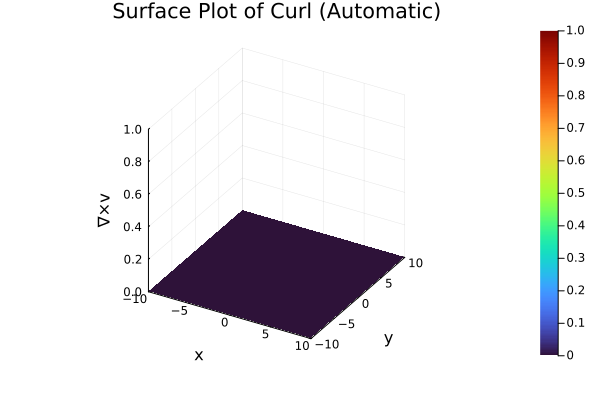

Results:
  ✓ Curl (analytical): ∇×v = 0 everywhere
  ✓ The velocity field is IRROTATIONAL

Physical interpretation:
  • ∇×v = 0 means fluid particles do not rotate
  • The flow may converge/diverge but doesn't swirl


In [46]:

using Plots
#using ForwardDiff
using CalculusWithJulia                                 

velocity_field(v)=[v[1], -v[2]^2]

x_range = -10:0.1:10
y_range = -10:0.1:10

curl_auto(x, y) = curl(velocity_field, [x, y]) 
velocity_field_curl= [curl_auto(xi, yi) for xi in x_range, yi in y_range]           

p=surface(x_range, y_range, velocity_field_curl',
    xlabel="x",
    ylabel="y",
    zlabel="∇×v",
    color=:turbo,
    title="Surface Plot of Curl (Automatic)")  
display(p)

println("="^60)
println("Results:")
println("  ✓ Curl (analytical): ∇×v = 0 everywhere")
println("  ✓ The velocity field is IRROTATIONAL")
println()
println("Physical interpretation:")
println("  • ∇×v = 0 means fluid particles do not rotate")
println("  • The flow may converge/diverge but doesn't swirl")
println("="^60)

# Problem 3
Consider that the velocity of water particles in a river is described by the vector field
# $$f=e^xy^2e1+(x+2y)e2$$
# (a)
 Plot the given vector field in Julia. (you may use the package called Plots.jl or CalculusWithJulia.jl)


Creating vector field plot...


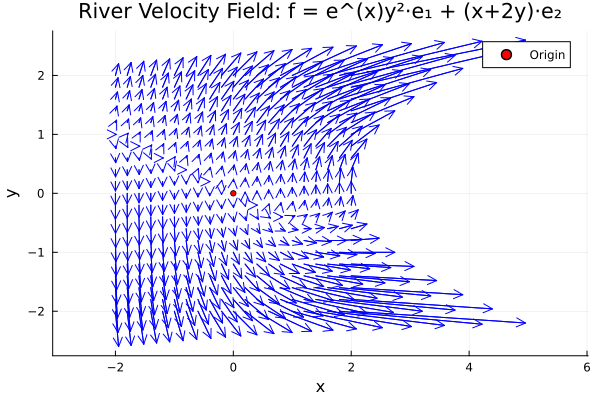

In [52]:

using Plots

println("="^60)
println()

f_x(x, y) = exp(x)*y^2    
f_y(x, y) = x + 2*y         

# Creatig grid for vector field 
x_vec = -2:0.2:2
y_vec = -2:0.2:2

# Calculating velocity vectors at each grid point
X = [x for x in x_vec, y in y_vec]
Y = [y for x in x_vec, y in y_vec]
U = f_x.(X, Y)
V = f_y.(X, Y)

println("Creating vector field plot...")

vector_plot = plot(
    xlabel="x",
    ylabel="y",
    title="River Velocity Field: f = e^(x)y²·e₁ + (x+2y)·e₂",
    aspect_ratio=:equal,
    size=(600, 400),
    grid=true,
    legend=:topright)

quiver!(vector_plot, X, Y, quiver=(U./10, V./10),
    color=:blue,
    linewidth=1,
    arrow=true,
    label="Velocity vectors (normalized)")

# Adding origin marker
scatter!(vector_plot, [0], [0], 
    color=:red, 
    markersize=3, 
    label="Origin")

display(vector_plot)


# (b)  
Plot the divergence of the vector field using automatic divergence calculation available in the Julia
package called CalculusWithJulia.jl. Also, determine the divergence using the detailed calculation
and plot the same. Compare both plots and verify the results

Method_1
Calculating Divergence using Automatic Differentiation...
Creating divergence plots...


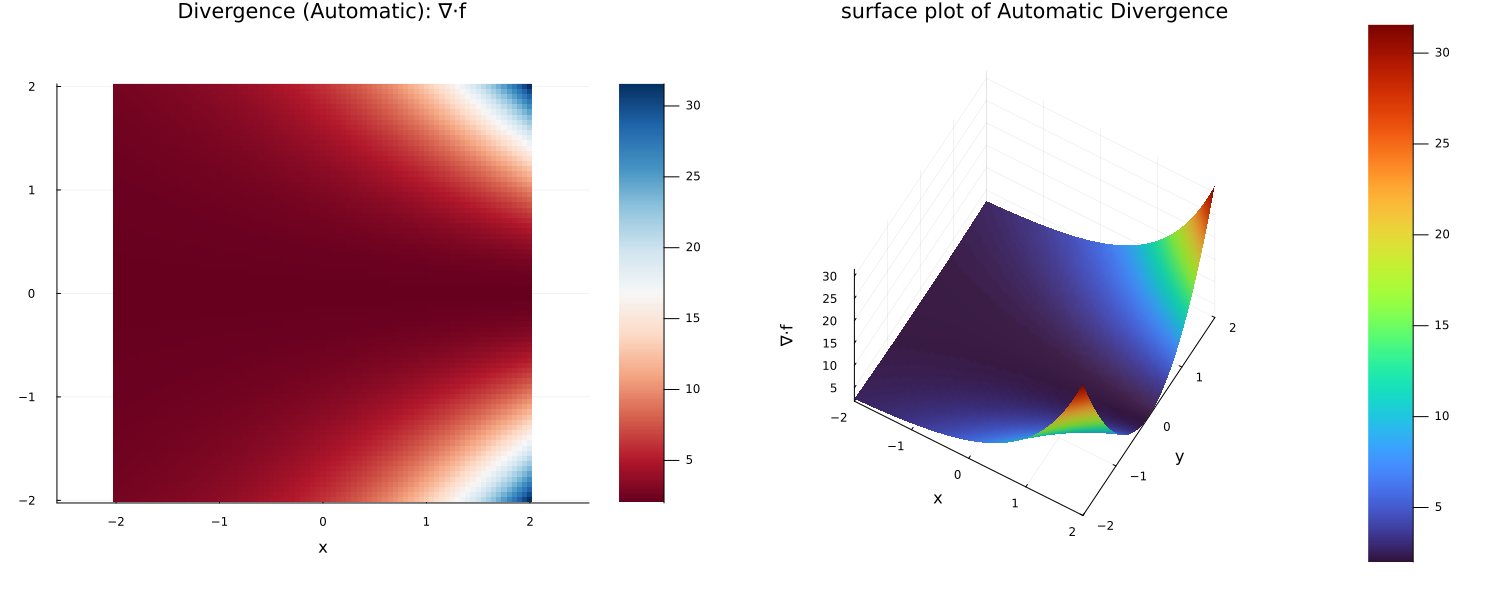

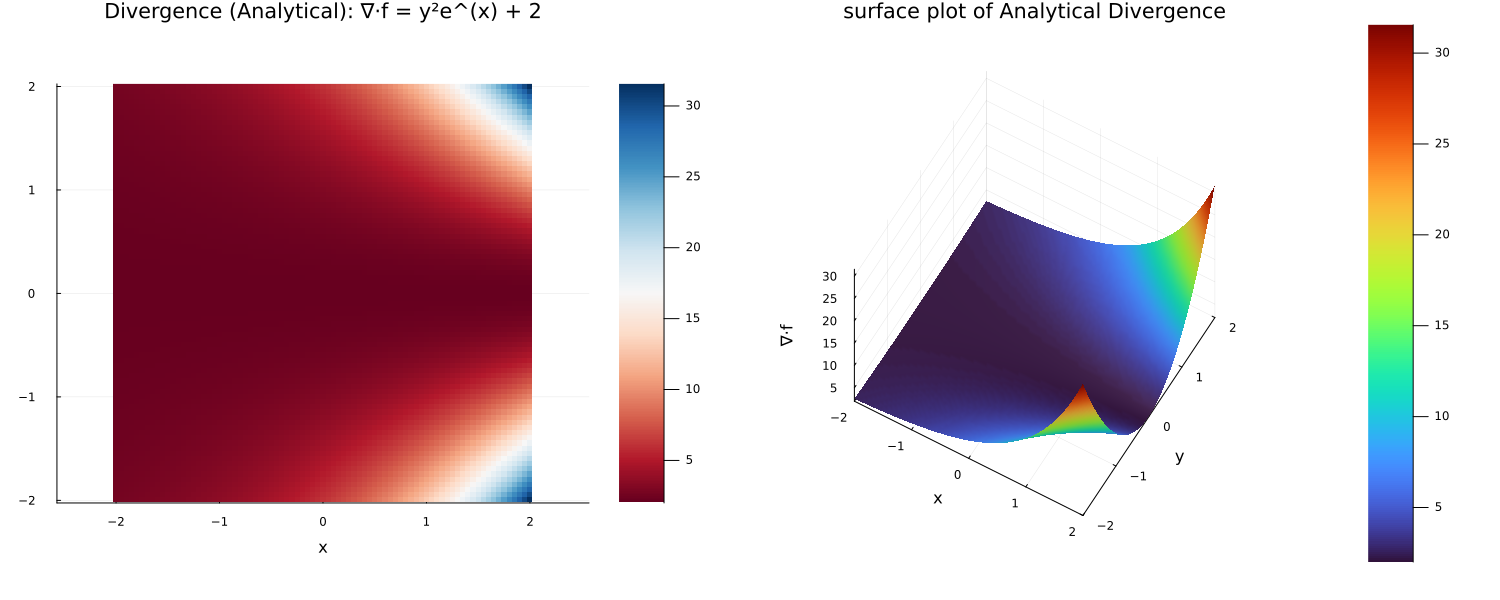

In [ ]:

using Plots
#using ForwardDiff
using CalculusWithJulia             


println("="^60)

# f = e^(xy²)*e₁ + (x + 2y)*e₂
V_field(v)=[exp(v[1])*v[2]^2, v[1]+2*v[2]]     
#V_field([x,y])

# METHOD 1: AUTOMATIC DIVERGENCE using CalculusWithJulia
println("Method_1")                 
println("Calculating Divergence using Automatic Differentiation...")                            

#V_field_div(v) = divergence(V_field, v)
V_field_div(x,y) = divergence(V_field, [x,y])

x_range = -2:0.05:2
y_range = -2:0.05:2

V_field_divergence = [V_field_div([xi, yi]) for xi in x_range, yi in y_range]         

# METHOD 2: DETAILED CALCULATION (Manual/Analytical)

# Define the analytical divergence
divergence_analytical(x, y) = y^2 * exp(x) + 2

# PLOTTING
println("Creating divergence plots...")

# Plot 1: Automatic divergence
p1 = heatmap(x_range, y_range, V_field_divergence',
    xlabel="x",
    ylabel="y",
    title="Divergence (Automatic): ∇·f",
    colorbar=true,
    color=:RdBu,
    aspect_ratio=:equal)
# Add zero contour line
contour!(p1, x_range, y_range, V_field_divergence',
    levels=[0],
    color=:black,
    linewidth=2,
    label="∇·f = 0")
p2=surface(x_range, y_range, V_field_divergence',
    xlabel="x",
    ylabel="y",
    zlabel="∇·f",
    title="surface plot of Automatic Divergence",
    color=:turbo,
    camera=(30,60))           
combined1=plot(p1, p2, layout=(1,2), size=(1500,600))       
display(combined1)                                             

# Plot 2: Analytical divergence
div_analytical_grid = [divergence_analytical(x, y) for x in x_range, y in y_range]

p3 = heatmap(x_range, y_range, div_analytical_grid',
    xlabel="x",
    ylabel="y",
    title="Divergence (Analytical): ∇·f = y²e^(x) + 2",
    colorbar=true,
    color=:RdBu,
    aspect_ratio=:equal)

# Add zero contour line
contour!(p3, x_range, y_range, div_analytical_grid',
    levels=[0],
    color=:black,
    linewidth=2,
    label="∇·f = 0")
p4=surface(x_range, y_range, div_analytical_grid',
    xlabel="x",
    ylabel="y",
    zlabel="∇·f",
    title="surface plot of Analytical Divergence",
    color=:turbo,
    camera=(30,60)) 
combined2 = plot(p3, p4, layout=(1,2), size=(1500, 600))
display(combined2)

# (C)
Determine the curl of the vector field using automatic curl calculation available in the Julia package
CalculusWithJulia.jl. Also, determine the curl using detailed calculation and plot the same. Compare
both plots and verify the results.

Creating curl plots...


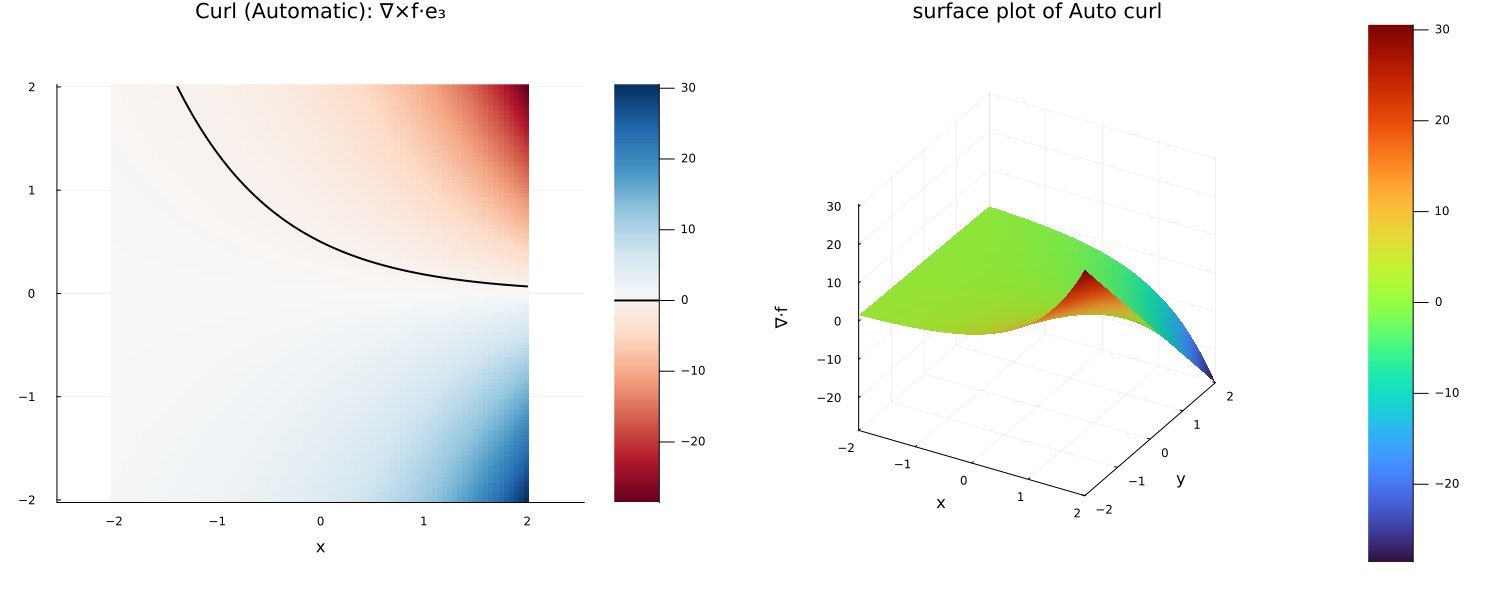

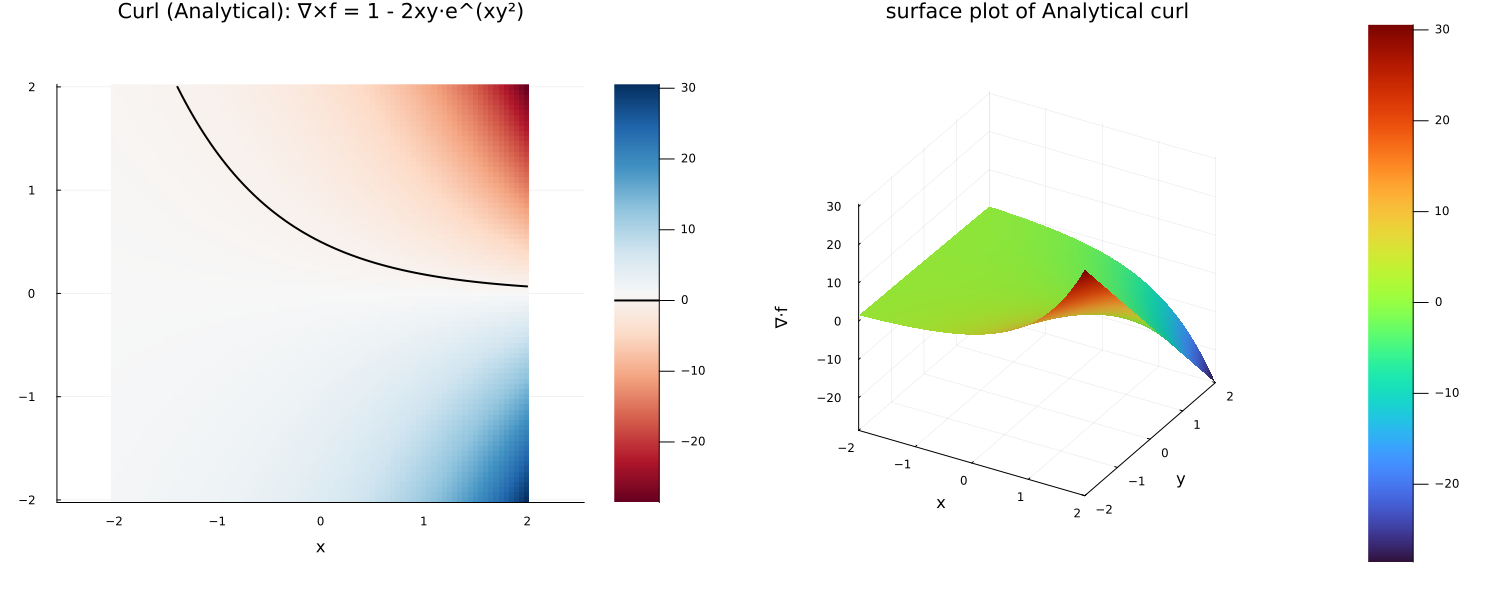

In [70]:

using Plots
#using ForwardDiff
using CalculusWithJulia


V_field(v)=[exp(v[1])*v[2]^2, v[1]+2*v[2]]     


# METHOD 1: AUTOMATIC CURL using ForwardDiff

V_field_curl(v) = curl(V_field, v)

x_range = -2:0.05:2
y_range = -2:0.05:2

V_auto_curl=[V_field_curl([xi,yi]) for xi in x_range, yi in y_range]

# METHOD 2:  Manual/Analytical

curl_analytical(x, y) = -2*y*exp(x)+1

println("="^60)

# PLOTTING
println("Creating curl plots...")

# Define domain


# Plot 1: Automatic curl
curl_auto_grid = [curl_auto(x, y) for x in x_range, y in y_range]

p1 = heatmap(x_range, y_range, V_auto_curl',
    xlabel="x",
    ylabel="y",
    title="Curl (Automatic): ∇×f·e₃",
    colorbar=true,
    color=:RdBu,
    aspect_ratio=:equal)

# Add zero contour line
contour!(p1, x_range, y_range, V_auto_curl',
    levels=[0],
    color=:black,
    linewidth=2,
    label="∇×f = 0")
 p2= surface(x_range,y_range,V_auto_curl',
      xlabel="x",
      ylabel="y",
      zlabel="∇·f",
      title="surface plot of Auto curl",
      color=:turbo)
combined1=plot(p1, p2, layout=(1,2), size=(1500,600))       
display(combined1) 


# Plot 2: Analytical curl
curl_analytical_grid = [curl_analytical(x, y) for x in x_range, y in y_range]

p3 = heatmap(x_range, y_range, curl_analytical_grid',
    xlabel="x",
    ylabel="y",
    title="Curl (Analytical): ∇×f = 1 - 2xy·e^(xy²)",
    colorbar=true,
    color=:RdBu,
    aspect_ratio=:equal)

# Adding zero contour line
contour!(p3, x_range, y_range, curl_analytical_grid',
    levels=[0],
    color=:black,
    linewidth=2,
    label="∇×f = 0")
p4=surface(x_range,y_range,curl_analytical_grid',
      xlabel="x",
      ylabel="y",
      zlabel="∇·f",
      title="surface plot of Analytical curl",
      color=:turbo)
combined2=plot(p3, p4, layout=(1,2), size=(1500,600))       
display(combined2) 

# Problem 4
Write a Julia code for the solution of the beam problem shown in Fig. 1. Plot the bending moment
diagram (BMD) and shear force diagram (SFD). Your code should be generic enough to take any value
for the input variables l and q.

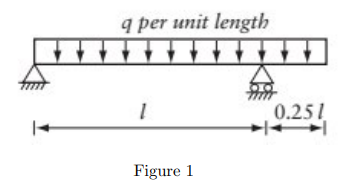

Question 4: Beam with Overhang

------------------------------------------------------------
Point of zero shear: x = 0.469 m



------------------------------------------------------------
Maximum Bending Moment: M_max = 0.11 kN⋅m at x = 0.469 m


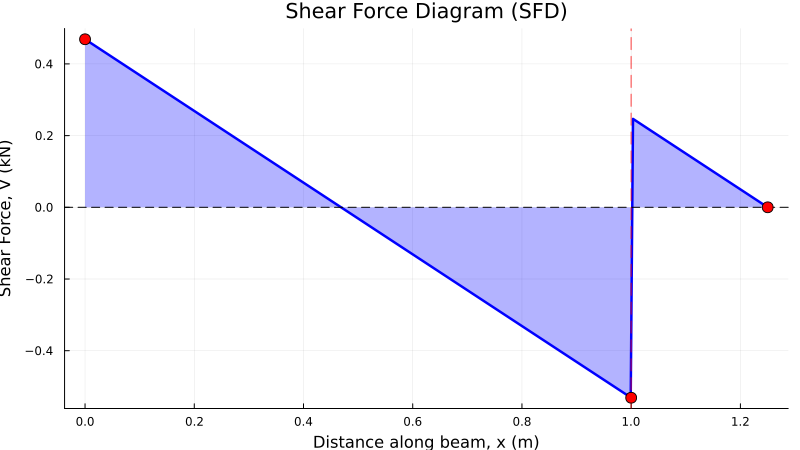

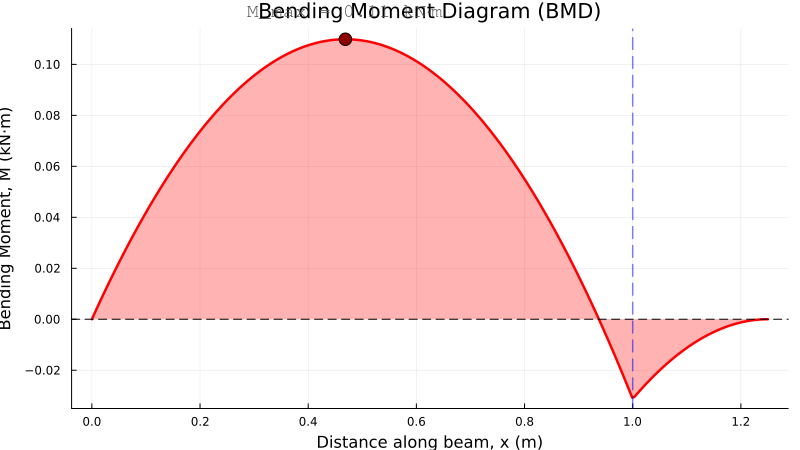

In [ ]:

using Plots

println("Question 4: Beam with Overhang")
println("="^60)
println()

# INPUT PARAMETERS 
l = 1.0    # Distance between supports (m)
q = 1.0   # UDL (kN/m)

# Beam configuration
L_overhang = 0.25 * l    # Overhang length
L_total = l + L_overhang  # Total beam length

# STEP 1: Calculating Support Reactions
println("-"^60)

# Taking moments about point A:

R_B = (q * L_total * (L_total / 2)) / l
R_A = q * L_total - R_B

# STEP 2: Shear Force Diagram (SFD)
function shear_force(x, q, l, R_A, R_B)
    if x <= l
        return R_A - q * x
    else
        return R_A + R_B - q * (x)
    end
end

# Key values
V_at_A_right = shear_force(0 + 1e-6, q, l, R_A, R_B)
V_at_B_left = shear_force(l - 1e-6, q, l, R_A, R_B)
V_at_B_right = shear_force(l + 1e-6, q, l, R_A, R_B)
V_at_end = shear_force(L_total, q, l, R_A, R_B)

# Point of zero shear (maximum moment location)
x_zero_shear = R_A / q
if x_zero_shear >= 0 && x_zero_shear <= l
    println("Point of zero shear: x = $(round(x_zero_shear, digits=3)) m")
else
    println("No zero shear point between supports")
end
println()

# STEP 3: Bending Moment Diagram (BMD)

println("-"^60)

function bending_moment(x, q, l, R_A, R_B)
    if x <= l
        return R_A * x - (q * x^2) / 2
    else
        return R_A * x - (q * x^2) / 2 + R_B * (x - l)
    end
end

# Key values
M_at_A = bending_moment(0, q, l, R_A, R_B)
M_at_B = bending_moment(l, q, l, R_A, R_B)
M_at_end = bending_moment(L_total, q, l, R_A, R_B)

# Maximum moment (at zero shear if it exists in span)
if x_zero_shear >= 0 && x_zero_shear <= l
    M_max = bending_moment(x_zero_shear, q, l, R_A, R_B)
    x_max = x_zero_shear
else
    M_max = M_at_B
    x_max = l
end
println("Maximum Bending Moment: M_max = $(round(M_max, digits=3)) kN⋅m at x = $(round(x_max, digits=3)) m")

# Creating x-coordinates
x_coords = range(0, L_total, length=300)

# Calculating shear and moment values
V_values = [shear_force(x, q, l, R_A, R_B) for x in x_coords]
M_values = [bending_moment(x, q, l, R_A, R_B) for x in x_coords]

# Plot 1: Shear Force Diagram (SFD)
sfd_plot = plot(
    x_coords, V_values,
    xlabel="Distance along beam, x (m)",
    ylabel="Shear Force, V (kN)",
    title="Shear Force Diagram (SFD)",
    color=:blue,
    linewidth=2.5,
    legend=false,
    size=(800, 450),
    grid=true,
    fill=(0, 0.3, :blue))

# Adding zero line
hline!(sfd_plot, [0], color=:black, linewidth=1, linestyle=:dash)

# Adding vertical line at support B
vline!(sfd_plot, [l], color=:red, linewidth=1.5, linestyle=:dash, alpha=0.5)

# Mark key points
scatter!(sfd_plot, [0, l, L_total], [V_at_A_right, V_at_B_left, V_at_end],
    markersize=6, color=:red)

display(sfd_plot)


# Plot 2: Bending Moment Diagram (BMD)
bmd_plot = plot(
    x_coords, M_values,
    xlabel="Distance along beam, x (m)",
    ylabel="Bending Moment, M (kN⋅m)",
    title="Bending Moment Diagram (BMD)",
    color=:red,
    linewidth=2.5,
    legend=false,
    size=(800, 450),
    grid=true,
    fill=(0, 0.3, :red))

# Add zero line
hline!(bmd_plot, [0], color=:black, linewidth=1, linestyle=:dash)

# Add vertical line at support B
vline!(bmd_plot, [l], color=:blue, linewidth=1.5, linestyle=:dash, alpha=0.5)

# Mark maximum moment
scatter!(bmd_plot, [x_max], [M_max],
    markersize=7, color=:darkred)
annotate!(bmd_plot, x_max, M_max + abs(M_max)*0.1, 
    text("M_max = $(round(M_max, digits=2)) kN⋅m", :darkred, :center, 10, :bold))

display(bmd_plot)

# problem 5
Write a Julia code for the solution of the beam problem shown in Fig. 2. Plot the BMD and SFD. Your
code should be generic enough to take any value for the input variables l and q

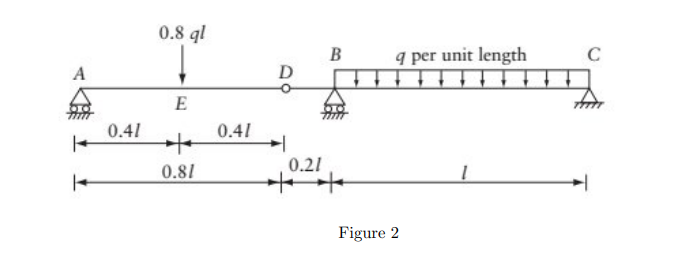

Extreme bending moments:
  Maximum positive M = 3.996 kN⋅m at x = 2.002 m
  Maximum negative M = -1.99 kN⋅m at x = 4.995 m
  Maximum absolute |M| = 3.996 kN⋅m

------------------------------------------------------------


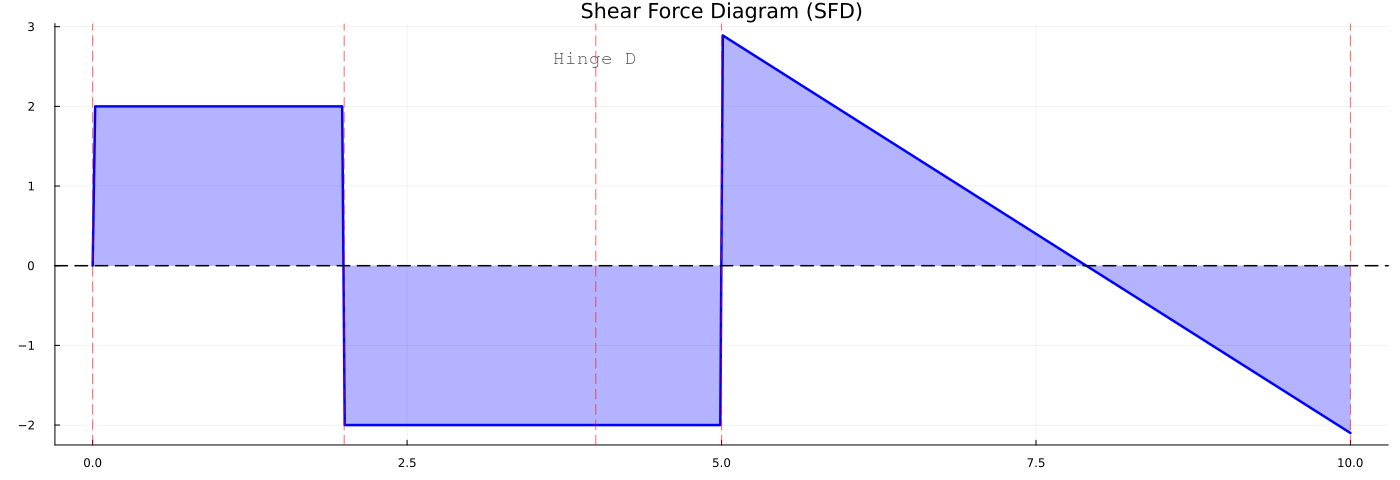

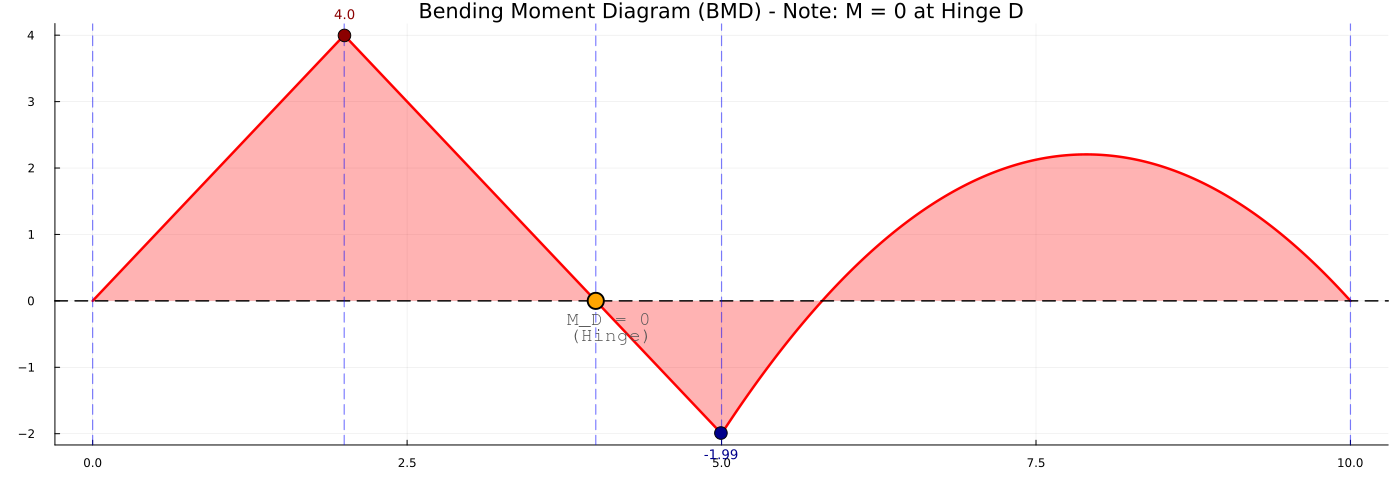

In [ ]:
using Plots

# INPUT PARAMETERS 
l = 5.0    # Base length (m)
q = 1.0    # Uniformly Distributed Load (kN/m)

# Beam configuration
P = 0.8 * q * l          # Point load at E
x_A = 0.0                # Position of support A (Roller)
x_E = 0.4 * l            # Position of point load E
x_D = 0.8 * l            # Position of HINGE D
x_B = 1.0 * l            # Position of support B (Roller)
x_C = 2.0 * l            # Position of support C (Pinned)
L_total = x_C            # Total beam length

# UDL from B to C
udl_start = x_B
udl_end = x_C
udl_length = udl_end - udl_start

# STEP 1:Support Reactions
# Total load
total_load = P + q * udl_length

# From hinge condition at D:

R_A = P * (x_D - x_E) / x_D

# ΣM_C = 0

M_P_about_C = P * (x_C - x_E)
M_udl_about_C = q * udl_length * (udl_length / 2)
R_B = (M_P_about_C + M_udl_about_C - R_A * x_C) / (x_C - x_B)

# From vertical equilibrium:
R_C = total_load - R_A - R_B

# STEP 2:  SFD

function shear_force(x, q, l, P, R_A, R_B, R_C)
    V = 0.0

    if x > x_A
        V += R_A
    end
    
    if x > x_E
        V -= P
    end

    if x > x_B
        V += R_B
    end

    if x > x_B && x <= x_C
        V -= q * (x - x_B)
    elseif x > x_C
        V -= q * (x_C - x_B)
    end
    
    # Adding reaction at C if we've passed it
    if x > x_C
        V += R_C
    end

    return V
end

# STEP 3: Bending Moment Diagram (BMD)

function bending_moment(x, q, l, P, R_A, R_B, R_C)
    M = 0.0
    
    if x > x_A
        M += R_A * (x - x_A)
    end
    
    if x > x_E
        M -= P * (x - x_E)
    end
    
    if x > x_B
        M += R_B * (x - x_B)
    end

    if x > x_B && x <= x_C
        udl_dist = x - x_B
        M -= q * udl_dist * (udl_dist / 2)
    elseif x > x_C
        udl_dist = x_C - x_B
        M -= q * udl_dist * (x - x_B - udl_dist / 2)
    end
    
    # Contribution from reaction at C
    if x > x_C
        M += R_C * (x - x_C)
    end
    
    return M
end

# Key moment values
M_at_A = bending_moment(x_A, q, l, P, R_A, R_B, R_C)
M_at_E = bending_moment(x_E, q, l, P, R_A, R_B, R_C)
M_at_D = bending_moment(x_D, q, l, P, R_A, R_B, R_C)
M_at_B = bending_moment(x_B, q, l, P, R_A, R_B, R_C)
M_at_C = bending_moment(x_C, q, l, P, R_A, R_B, R_C)

# Finding maximum moment
x_fine = range(0, L_total, length=1000)
M_fine = [bending_moment(x, q, l, P, R_A, R_B, R_C) for x in x_fine]
M_max_pos = maximum(M_fine)
M_min_neg = minimum(M_fine)
M_max_abs = max(abs(M_max_pos), abs(M_min_neg))

M_max_pos_idx = argmax(M_fine)
M_min_neg_idx = argmin(M_fine)
x_max_pos = x_fine[M_max_pos_idx]
x_min_neg = x_fine[M_min_neg_idx]

println("Extreme bending moments:")
println("  Maximum positive M = $(round(M_max_pos, digits=3)) kN⋅m at x = $(round(x_max_pos, digits=3)) m")
println("  Maximum negative M = $(round(M_min_neg, digits=3)) kN⋅m at x = $(round(x_min_neg, digits=3)) m")
println("  Maximum absolute |M| = $(round(M_max_abs, digits=3)) kN⋅m")
println()

# STEP 4: Plotting

println("-"^60)

# Create x-coordinates
x_coords = range(0, L_total, length=500)

# Calculate shear and moment values
V_values = [shear_force(x, q, l, P, R_A, R_B, R_C) for x in x_coords]
M_values = [bending_moment(x, q, l, P, R_A, R_B, R_C) for x in x_coords]

# Plot 1: Shear Force Diagram
sfd_plot = plot(
    x_coords, V_values,
    xlabel="Distance along beam, x (m)",
    ylabel="Shear Force, V (kN)",
    title="Shear Force Diagram (SFD)",
    color=:blue,
    linewidth=2.5,
    legend=false,
    size=(1400, 480),
    grid=true,
    fill=(0, 0.3, :blue))

hline!(sfd_plot, [0], color=:black, linewidth=1.5, linestyle=:dash)
vline!(sfd_plot, [x_A, x_E, x_D, x_B, x_C], color=:red, linewidth=1.2, linestyle=:dash, alpha=0.5)

annotate!(sfd_plot, x_D, maximum(V_values)*0.9, text("Hinge D", :orange, :center, 10, :bold))

display(sfd_plot)
#savefig(sfd_plot, "q5_sfd.png")

# Plot 2: Bending Moment Diagram
bmd_plot = plot(
    x_coords, M_values,
    xlabel="Distance along beam, x (m)",
    ylabel="Bending Moment, M (kN⋅m)",
    title="Bending Moment Diagram (BMD) - Note: M = 0 at Hinge D",
    color=:red,
    linewidth=2.5,
    legend=false,
    size=(1400, 480),
    grid=true,
    fill=(0, 0.3, :red))

hline!(bmd_plot, [0], color=:black, linewidth=1.5, linestyle=:dash)
vline!(bmd_plot, [x_A, x_E, x_D, x_B, x_C], color=:blue, linewidth=1.2, linestyle=:dash, alpha=0.5)

# Mark hinge location (M=0)
scatter!(bmd_plot, [x_D], [M_at_D],
    markersize=9, color=:orange, markerstrokewidth=2, markerstrokecolor=:black)
annotate!(bmd_plot, x_D, M_at_D - abs(M_max_abs)*0.1, 
    text("M_D = 0\n(Hinge)", :orange, :center, 10, :bold))

# Mark maximum moments
if abs(M_max_pos) > 0.1
    scatter!(bmd_plot, [x_max_pos], [M_max_pos],
        markersize=7, color=:darkred)
    annotate!(bmd_plot, x_max_pos, M_max_pos + abs(M_max_abs)*0.08, 
        text("$(round(M_max_pos, digits=2))", :darkred, :center, 9))
end

if abs(M_min_neg) > 0.1
    scatter!(bmd_plot, [x_min_neg], [M_min_neg],
        markersize=7, color=:darkblue)
    annotate!(bmd_plot, x_min_neg, M_min_neg - abs(M_max_abs)*0.08, 
        text("$(round(M_min_neg, digits=2))", :darkblue, :center, 9))
end

display(bmd_plot)